In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_excel('Dataset.xlsx')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 67 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   contact_recipients         7160 non-null   object 
 1   longitude                  6042 non-null   float64
 2   countyFIPS                 5896 non-null   float64
 3   imgSrc                     6043 non-null   object 
 4   livingAreaValue            5869 non-null   float64
 5   streetAddress              6043 non-null   object 
 6   county                     5995 non-null   object 
 7   monthlyHoaFee              1161 non-null   float64
 8   timeZone                   6043 non-null   object 
 9   taxHistory                 6043 non-null   object 
 10  dateSold                   221 non-null    object 
 11  annualHomeownersInsurance  7160 non-null   int64  
 12  state                      6043 non-null   object 
 13  listed_by                  7160 non-null   objec

In [4]:
data.head(5)

,contact_recipients,longitude,countyFIPS,imgSrc,livingAreaValue,streetAddress,county,monthlyHoaFee,timeZone,taxHistory,...,mlsid,listingSubType,pageViewCount,buildingId,country,homeType,solarPotential,contingentListingType,message,resoFacts.daysOnZillow
0,"[{'agent_reason': 1, 'zpro': None, 'recent_sal...",-149.90807,2020.0,https://photos.zillowstatic.com/fp/ce047439c86...,2668.0,500 North St,Anchorage Borough,NaN,America/Anchorage,"[{'time': 1691996796990, 'valueIncreaseRate': ...",...,NaN,"{'is_FSBA': False, 'is_comingSoon': False, 'is...",12925.0,NaN,USA,SINGLE_FAMILY,NaN,NaN,NaN,NaN
1,"[{'agent_reason': 1, 'zpro': None, 'recent_sal...",-149.90822,2020.0,https://maps.googleapis.com/maps/api/streetvie...,3179.0,520 N St,Anchorage Borough,NaN,America/Anchorage,"[{'time': 1692004111174, 'valueIncreaseRate': ...",...,NaN,"{'is_FSBA': False, 'is_comingSoon': False, 'is...",26.0,NaN,USA,SINGLE_FAMILY,NaN,NaN,NaN,NaN
2,"[{'agent_reason': 1, 'zpro': None, 'recent_sal...",-149.90833,2020.0,https://maps.googleapis.com/maps/api/streetvie...,3059.0,522 N St,Anchorage Borough,NaN,America/Anchorage,"[{'time': 1691999146138, 'valueIncreaseRate': ...",...,NaN,"{'is_FSBA': False, 'is_comingSoon': False, 'is...",21.0,NaN,USA,SINGLE_FAMILY,NaN,NaN,NaN,NaN
3,{},NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"{'is_FSBA': False, 'is_comingSoon': False, 'is...",NaN,NaN,USA,NaN,NaN,NaN,NaN,NaN
4,"[{'agent_reason': 1, 'zpro': None, 'recent_sal...",-149.90834,2020.0,https://photos.zillowstatic.com/fp/10602cde74a...,1642.0,530 North St,Anchorage Borough,NaN,America/Anchorage,"[{'time': 1692004364225, 'valueIncreaseRate': ...",...,NaN,"{'is_FSBA': False, 'is_comingSoon': False, 'is...",26.0,NaN,USA,SINGLE_FAMILY,NaN,NaN,NaN,NaN


In [5]:
data.keys()

Index(['contact_recipients', 'longitude', 'countyFIPS', 'imgSrc',
       'livingAreaValue', 'streetAddress', 'county', 'monthlyHoaFee',
       'timeZone', 'taxHistory', 'dateSold', 'annualHomeownersInsurance',
       'state', 'listed_by', 'yearBuilt', 'brokerageName', 'description',
       'latitude', 'nearbyHomes', 'priceHistory', 'schools', 'rentZestimate',
       'city', 'providerListingID', 'currency', 'listingProvider',
       'zestimateLowPercent', 'openHouseSchedule', 'mortgageRates', 'address',
       'cityId', 'timeOnZillow', 'url', 'zestimate', 'zpid', 'countyId',
       'brokerId', 'livingAreaUnits', 'comingSoonOnMarketDate', 'livingArea',
       'building', 'stateId', 'zipcode', 'propertyTaxRate', 'attributionInfo',
       'bathrooms', 'homeStatus', 'homeFacts', 'resoFacts', 'datePosted',
       'bedrooms', 'propertyTypeDimension', 'mortgageZHLRates', 'price',
       'favoriteCount', 'isListedByOwner', 'zestimateHighPercent', 'mlsid',
       'listingSubType', 'pageViewCount

In [6]:
#selecting the columns which are needed for our house prediction
df= pd.DataFrame(data[['annualHomeownersInsurance','state','yearBuilt','livingArea','bathrooms','bedrooms','homeType','price']])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   annualHomeownersInsurance  7160 non-null   int64  
 1   state                      6043 non-null   object 
 2   yearBuilt                  5690 non-null   float64
 3   livingArea                 5869 non-null   float64
 4   bathrooms                  5917 non-null   float64
 5   bedrooms                   5832 non-null   float64
 6   homeType                   6269 non-null   object 
 7   price                      7160 non-null   int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 447.6+ KB


In [8]:
df.isnull().sum()

annualHomeownersInsurance       0
state                        1117
yearBuilt                    1470
livingArea                   1291
bathrooms                    1243
bedrooms                     1328
homeType                      891
price                           0
dtype: int64

In [9]:
df.describe()

,annualHomeownersInsurance,yearBuilt,livingArea,bathrooms,bedrooms,price
count,7160.000000,5690.000000,5869.000000,5917.000000,5832.000000,7.160000e+03
mean,1211.979888,1976.310545,1795.795025,2.059422,3.161008,2.885633e+05
std,994.675514,13.387253,1532.936783,0.996827,1.294939,2.368257e+05
min,0.000000,1880.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,0.000000,1970.000000,1141.000000,1.500000,2.000000,0.000000e+00
50%,1326.000000,1977.000000,1670.000000,2.000000,3.000000,3.156000e+05
75%,1803.000000,1983.000000,2128.000000,2.500000,4.000000,4.294000e+05
max,11550.000000,2023.000000,95337.000000,30.000000,30.000000,2.750000e+06


In [10]:
#Lets rename the column names
df = df.rename(columns={"annualHomeownersInsurance":"AnnualInsurance","state":"State", "yearBuilt":"YearBuilt","livingArea":"LivingArea","bathrooms":"Bathrooms","bedrooms":"Bedrooms","homeType":"HomeType","price":"Price"})

In [11]:
df.head()

,AnnualInsurance,State,YearBuilt,LivingArea,Bathrooms,Bedrooms,HomeType,Price
0,2840,AK,1959.0,2668.0,2.0,3.0,SINGLE_FAMILY,676100
1,2934,AK,1961.0,3179.0,2.0,3.0,SINGLE_FAMILY,698600
2,4187,AK,1983.0,3059.0,3.0,4.0,SINGLE_FAMILY,996800
3,0,NaN,NaN,NaN,NaN,NaN,NaN,0
4,2920,AK,1947.0,1642.0,2.0,5.0,SINGLE_FAMILY,695300


In [12]:
#we will dropping the rows where the state AK is Nan. 
df = df.drop(df.index[df['State'].isna()])

In [13]:
df.isnull().sum()

AnnualInsurance      0
State                0
YearBuilt          353
LivingArea         174
Bathrooms          126
Bedrooms           211
HomeType             0
Price                0
dtype: int64

In [14]:
df.head()

,AnnualInsurance,State,YearBuilt,LivingArea,Bathrooms,Bedrooms,HomeType,Price
0,2840,AK,1959.0,2668.0,2.0,3.0,SINGLE_FAMILY,676100
1,2934,AK,1961.0,3179.0,2.0,3.0,SINGLE_FAMILY,698600
2,4187,AK,1983.0,3059.0,3.0,4.0,SINGLE_FAMILY,996800
4,2920,AK,1947.0,1642.0,2.0,5.0,SINGLE_FAMILY,695300
5,4100,AK,2000.0,4483.0,4.0,4.0,CONDO,976100


In [15]:
df.reset_index(drop=True, inplace=True)

In [16]:
df

,AnnualInsurance,State,YearBuilt,LivingArea,Bathrooms,Bedrooms,HomeType,Price
0,2840,AK,1959.0,2668.0,2.0,3.0,SINGLE_FAMILY,676100
1,2934,AK,1961.0,3179.0,2.0,3.0,SINGLE_FAMILY,698600
2,4187,AK,1983.0,3059.0,3.0,4.0,SINGLE_FAMILY,996800
3,2920,AK,1947.0,1642.0,2.0,5.0,SINGLE_FAMILY,695300
4,4100,AK,2000.0,4483.0,4.0,4.0,CONDO,976100
...,...,...,...,...,...,...,...,...
6038,2764,AK,1978.0,4263.0,2.5,3.0,SINGLE_FAMILY,658100
6039,2160,AK,1974.0,2200.0,2.0,4.0,SINGLE_FAMILY,514200
6040,2768,AK,1972.0,4180.0,4.5,5.0,SINGLE_FAMILY,659000
6041,2979,AK,1972.0,3928.0,3.0,5.0,SINGLE_FAMILY,709400


In [17]:
# Have to handle missing values more
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6043 entries, 0 to 6042
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   AnnualInsurance  6043 non-null   int64  
 1   State            6043 non-null   object 
 2   YearBuilt        5690 non-null   float64
 3   LivingArea       5869 non-null   float64
 4   Bathrooms        5917 non-null   float64
 5   Bedrooms         5832 non-null   float64
 6   HomeType         6043 non-null   object 
 7   Price            6043 non-null   int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 377.8+ KB


In [18]:
df.isnull().sum()


AnnualInsurance      0
State                0
YearBuilt          353
LivingArea         174
Bathrooms          126
Bedrooms           211
HomeType             0
Price                0
dtype: int64

<AxesSubplot:xlabel='count', ylabel='Bathrooms'>

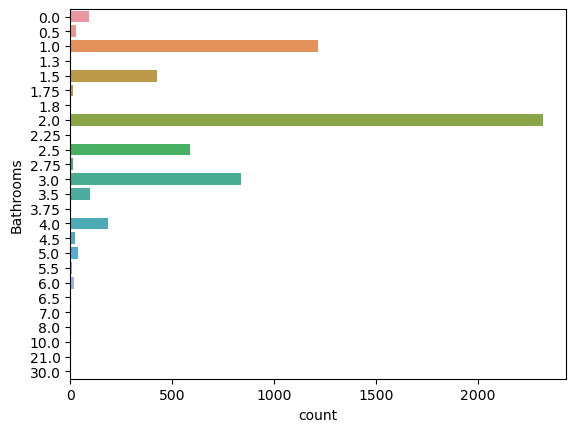

In [19]:
sns.countplot(y=df['Bathrooms'])

<AxesSubplot:xlabel='Bathrooms', ylabel='Density'>

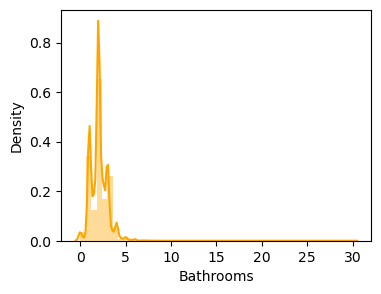

In [20]:
plt.figure(figsize=(4,3))
sns.distplot(df['Bathrooms'],kde=True,color='orange')

In [21]:
#From the above two plots, we can impute the missing values using the mean.
df['Bathrooms'] = df['Bathrooms'].fillna(int(df['Bathrooms'].mean()))

<AxesSubplot:xlabel='count', ylabel='Bedrooms'>

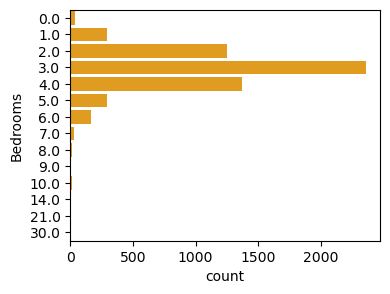

In [22]:
plt.figure(figsize=(4,3))
sns.countplot(y=df['Bedrooms'], color='orange')

In [23]:
#From the plot above, we can fill bedrooms na values with mean.
df['Bedrooms'] = df['Bedrooms'].fillna(int(df['Bedrooms'].mean()))

<AxesSubplot:xlabel='LivingArea', ylabel='Density'>

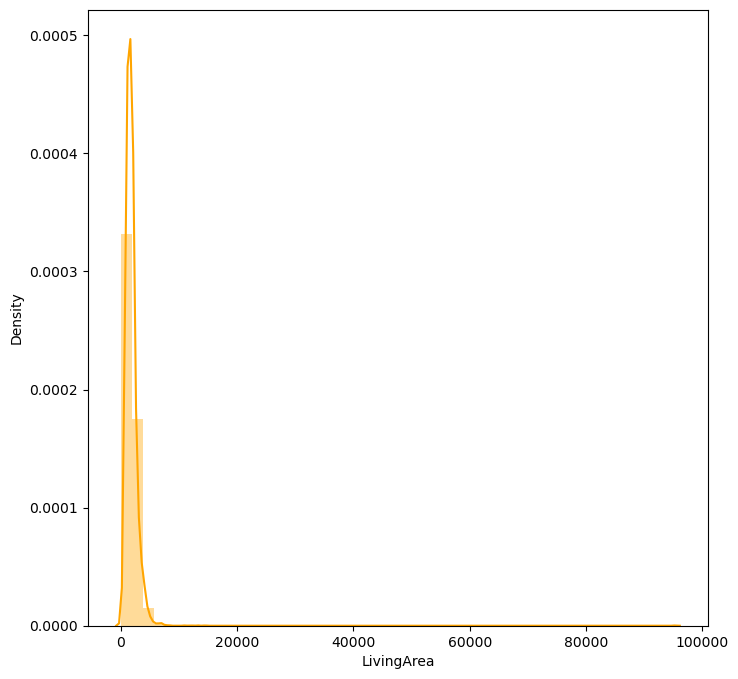

In [24]:
plt.figure(figsize=(8,8))
sns.distplot(df['LivingArea'],kde=True,color='orange')

In [25]:
#we cannot use mean for filling living area. if you see the dataset, there are outliers that might have effect on the mean of living area.
#Instead we can use median.
df['LivingArea'] = df['LivingArea'].fillna(int(df['LivingArea'].median()))

<AxesSubplot:title={'center':'Year Built'}, xlabel='YearBuilt', ylabel='Count'>

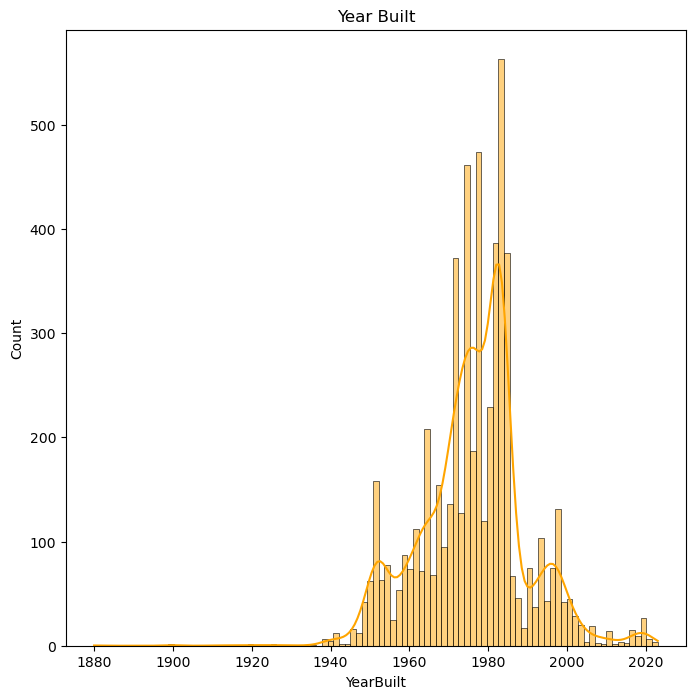

In [26]:
plt.figure(figsize=(8,8))
plt.title("Year Built")
sns.histplot(df['YearBuilt'],kde=True, color='orange')

In [27]:
yearbuilt_metric = [df['YearBuilt'].median(),
df['YearBuilt'].mean(),
df['YearBuilt'].mode()]
print(yearbuilt_metric)

[1977.0, 1976.3105448154656, 0    1983.0
Name: YearBuilt, dtype: float64]


In [28]:
#from the metrics above there is no big variance between the years. Filling values with median
df['YearBuilt'] =df['YearBuilt'].fillna(int(df['YearBuilt'].median()))

In [29]:
df.isna().sum()

AnnualInsurance    0
State              0
YearBuilt          0
LivingArea         0
Bathrooms          0
Bedrooms           0
HomeType           0
Price              0
dtype: int64

In [30]:
#Now let's get the numerical categrories

Num_categories = df.columns[df.dtypes!='O']
print(Num_categories)

Index(['AnnualInsurance', 'YearBuilt', 'LivingArea', 'Bathrooms', 'Bedrooms',
       'Price'],
      dtype='object')


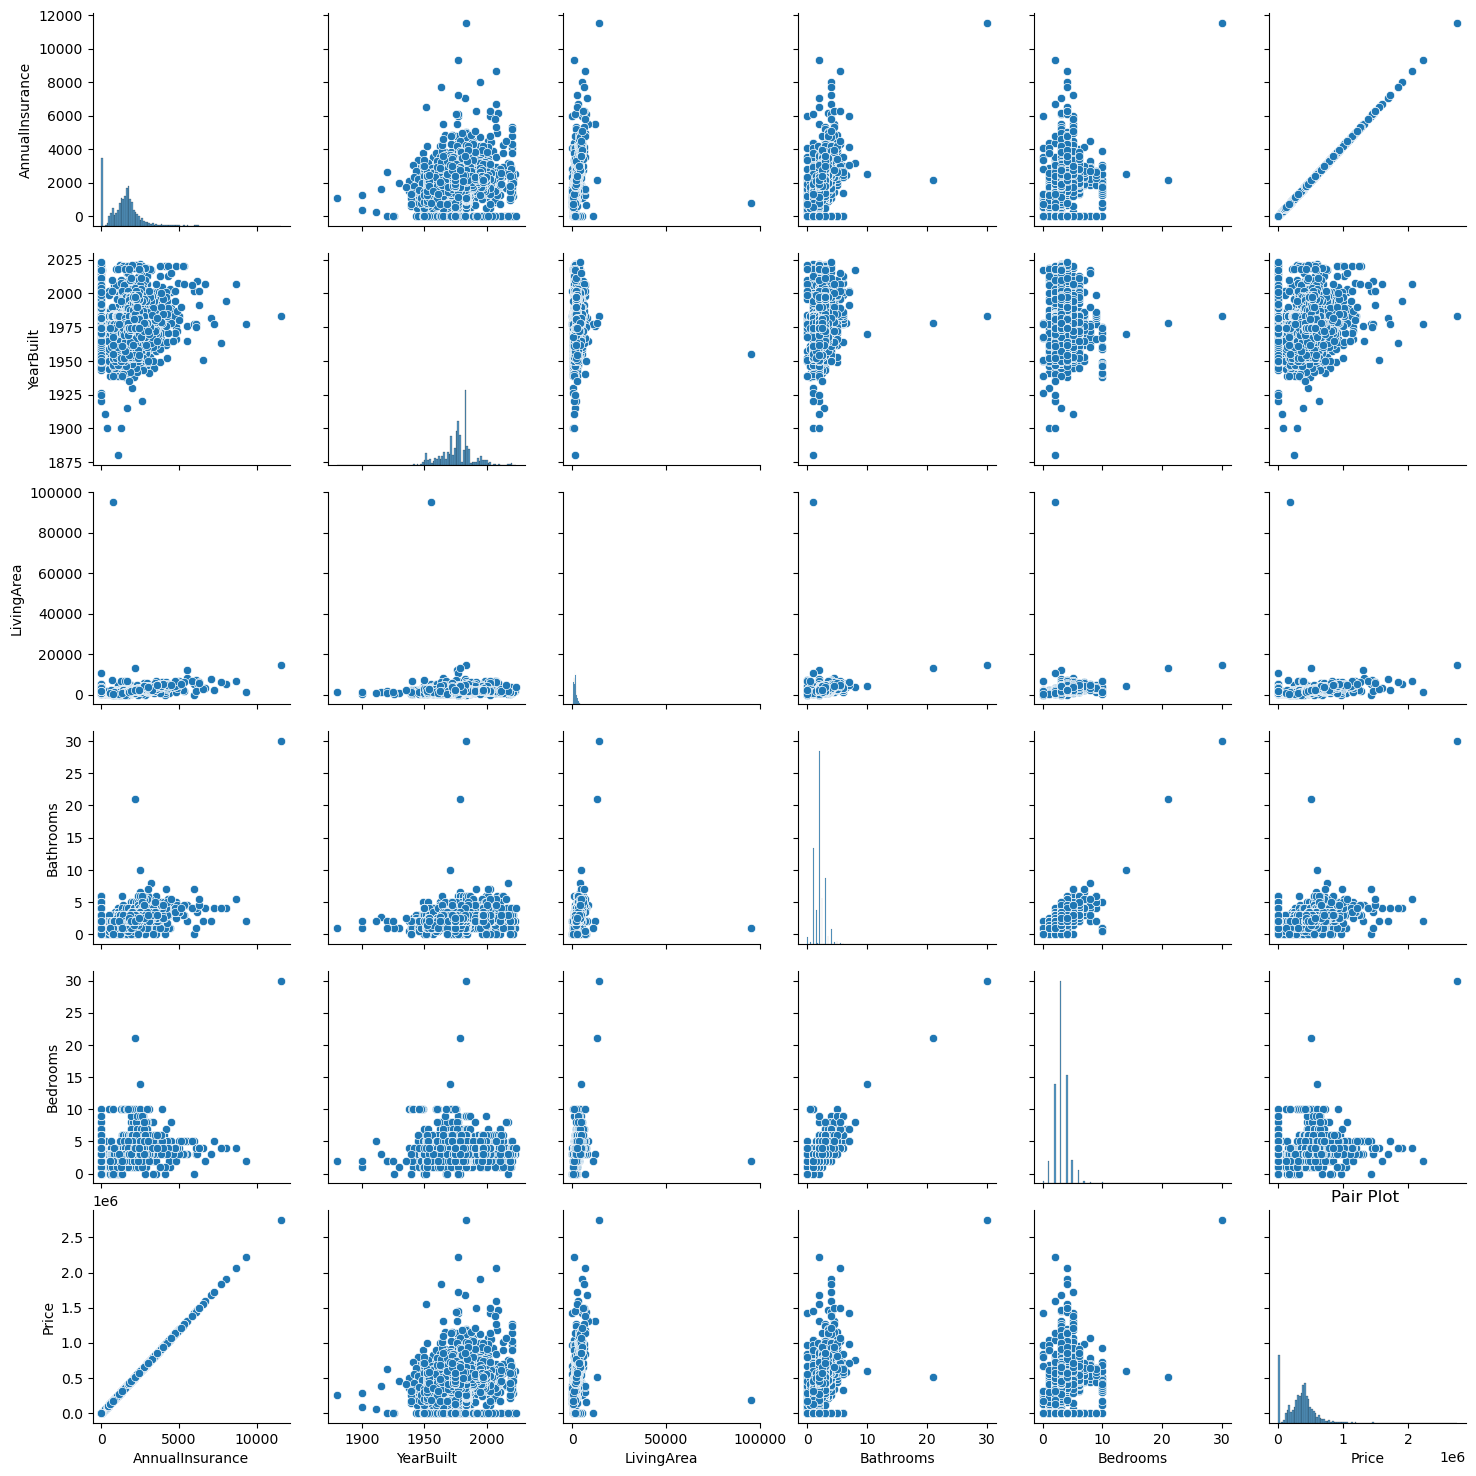

In [31]:
#Now let's check how all these num categorie related

sns.pairplot(df[Num_categories])
plt.title("Pair Plot ")
plt.show()


We can see a linear relationship between the price and annual home insurance.

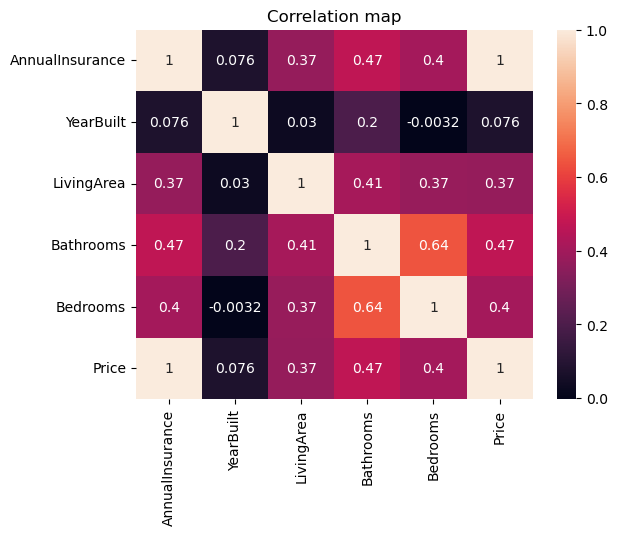

In [32]:
plt.title("Correlation map")
sns.heatmap(df[Num_categories].corr(),annot=True)
plt.show()

The num categories are mostly positively correlated to each other but price and insurance has strong correlation. So there is multicollinearity problem where linear regression will not work better for us but we can give a try and compare scores with other ML algorithms


In [33]:
#Lets encode the categorical values

len(df['State'].unique())


50

In [34]:
len(df['HomeType'].unique())

8

In [35]:
pd.get_dummies(df,drop_first=True).shape



(6043, 62)

In [36]:
df['State'].value_counts().sort_values(ascending=False).head(50)

AK    5636
CA      43
TX      42
MA      38
NY      27
FL      22
PA      21
NC      14
OH      13
GA      13
IL      13
MN      11
NJ      10
WI       9
SC       9
AL       8
WA       7
MO       7
MI       6
ON       5
CT       5
MD       5
IN       5
OK       5
MS       5
AZ       5
IA       5
ND       4
WV       4
KY       4
VA       4
TN       4
ME       3
MT       3
RI       3
ID       2
VT       2
NV       2
CO       2
OR       2
LA       2
PR       2
AR       2
DC       2
KS       2
SK       1
HI       1
WY       1
NM       1
DE       1
Name: State, dtype: int64

In [37]:
cat_columns = ['State','HomeType']
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(dtype=int,sparse=False)
encoded_cat = enc.fit_transform(df[cat_columns].values)
encoded_cat_df = pd.DataFrame(encoded_cat,columns=enc.get_feature_names_out(cat_columns))


In [38]:
# df_encoded = pd.concat([df,encoded_df],axis=1)
# df_encoded =df_encoded.drop(cat_columns,axis=1)
# df_encoded.drop(columns=['State_WY','HomeType_TOWNHOUSE'],axis=1)

In [39]:
df['Price'].isnull().sum()

0

In [40]:
#scaling the num values
Num_values = df[Num_categories].drop('Price',axis=1)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Num_encoded = scaler.fit_transform(Num_values.values)
encoded_num_df = pd.DataFrame(Num_encoded,columns=scaler.get_feature_names_out(Num_categories[0:-1]))
print(encoded_num_df)

      AnnualInsurance  YearBuilt  LivingArea  Bathrooms  Bedrooms
0            1.522494  -1.335682    0.579740  -0.058989 -0.122124
1            1.624428  -1.181721    0.917988  -0.058989 -0.122124
2            2.983182   0.511860    0.838556   0.954867  0.663814
3            1.609246  -2.259454   -0.099405  -0.058989  1.449752
4            2.888839   1.820536    1.781151   1.968724  0.663814
...               ...        ...         ...        ...       ...
6038         1.440080   0.126955    1.635525   0.447939 -0.122124
6039         0.785101  -0.180968    0.269955  -0.058989  0.663814
6040         1.444417  -0.334930    1.580585   2.475652  1.449752
6041         1.673226  -0.334930    1.413777   0.954867  1.449752
6042         1.056202  -0.180968    0.518842   0.447939  0.663814

[6043 rows x 5 columns]


In [41]:
#Saving the encoder for prediction
import pickle
import os
pickle.dump(enc,open('encoder.pkl','wb'))
pickle.dump(scaler, open('scaler.pkl','wb'))

In [42]:
df_encoded = pd.concat([encoded_num_df,encoded_cat_df],axis=1)

In [43]:
X = df_encoded
y = df['Price'].astype(int)

In [44]:
X

,AnnualInsurance,YearBuilt,LivingArea,Bathrooms,Bedrooms,State_AK,State_AL,State_AR,State_AZ,State_CA,...,State_WV,State_WY,HomeType_APARTMENT,HomeType_CONDO,HomeType_HOME_TYPE_UNKNOWN,HomeType_LOT,HomeType_MANUFACTURED,HomeType_MULTI_FAMILY,HomeType_SINGLE_FAMILY,HomeType_TOWNHOUSE
0,1.522494,-1.335682,0.579740,-0.058989,-0.122124,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1.624428,-1.181721,0.917988,-0.058989,-0.122124,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2.983182,0.511860,0.838556,0.954867,0.663814,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1.609246,-2.259454,-0.099405,-0.058989,1.449752,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,2.888839,1.820536,1.781151,1.968724,0.663814,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6038,1.440080,0.126955,1.635525,0.447939,-0.122124,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6039,0.785101,-0.180968,0.269955,-0.058989,0.663814,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6040,1.444417,-0.334930,1.580585,2.475652,1.449752,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6041,1.673226,-0.334930,1.413777,0.954867,1.449752,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [45]:
y

0       676100
1       698600
2       996800
3       695300
4       976100
         ...  
6038    658100
6039    514200
6040    659000
6041    709400
6042    573900
Name: Price, Length: 6043, dtype: int64

In [46]:
#Input Split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [47]:
X_train

,AnnualInsurance,YearBuilt,LivingArea,Bathrooms,Bedrooms,State_AK,State_AL,State_AR,State_AZ,State_CA,...,State_WV,State_WY,HomeType_APARTMENT,HomeType_CONDO,HomeType_HOME_TYPE_UNKNOWN,HomeType_LOT,HomeType_MANUFACTURED,HomeType_MULTI_FAMILY,HomeType_SINGLE_FAMILY,HomeType_TOWNHOUSE
5676,0.789439,0.357898,0.284517,0.447939,-0.122124,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3939,-1.557205,-0.103987,-0.429048,-0.058989,-0.122124,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1094,-0.227729,-1.874549,-0.532310,-1.072846,-0.122124,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1121,-0.758001,-2.182473,-0.650134,-1.072846,-0.908062,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3697,-0.863188,0.511860,-0.683231,-1.072846,-0.908062,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,0.037949,0.126955,-0.391980,-0.058989,-0.122124,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5191,0.982462,0.511860,0.970281,2.475652,2.235690,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5226,-0.252670,0.434879,-0.414485,-0.058989,-0.908062,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5390,0.072650,0.434879,0.021067,-0.565917,0.663814,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [48]:

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,accuracy_score

def evaluateModel(model,X_train,y_train,X_test,y_test):
    report= {}
    y_pred_train=model.predict(X_train)
    y_pred_test = model.predict(X_test)
    report['R2_score_train']=r2_score(y_train,y_pred_train)
    report['R2_score_test']=r2_score(y_test,y_pred_test)
    report['MSE_train']=mean_squared_error(y_train,y_pred_train)
    report['MSE_test']=mean_squared_error(y_test,y_pred_test)
    report['MAE_train']=mean_absolute_error(y_train,y_pred_train)
    report['MAE_test']=mean_absolute_error(y_test,y_pred_test)
    return report
    

In [49]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

In [50]:
evaluateModel(LR, X_train,y_train, X_test,y_test)

{'R2_score_train': 0.99999991903107,
 'R2_score_test': 0.9999999059090499,
 'MSE_train': 3979.274139800247,
 'MSE_test': 4181.525108164652,
 'MAE_train': 50.84846978272393,
 'MAE_test': 52.76111859620554}

The model performs great. Let's see other models performance

In [51]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor()
DT.fit(X_train,y_train)

DecisionTreeRegressor()

In [52]:
evaluateModel(DT,X_train,y_train,X_test,y_test)

{'R2_score_train': 0.999999999894768,
 'R2_score_test': 0.999949023224389,
 'MSE_train': 5.17170045510964,
 'MSE_test': 2265474.7022332507,
 'MAE_train': 0.06206040546131568,
 'MAE_test': 307.26468155500413}

The DT regression shows sign of overfitting because MSE train is low and MSE test is relatively very high

In [53]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor()
RF.fit(X_train,y_train)

RandomForestRegressor()

In [54]:
evaluateModel(RF,X_train,y_train,X_test,y_test)

{'R2_score_train': 0.9997348578208316,
 'R2_score_test': 0.9999667130318356,
 'MSE_train': 13030596.016487207,
 'MSE_test': 1479316.4806253195,
 'MAE_train': 197.78174291230772,
 'MAE_test': 216.42446374414118}

Based on RF scores, it is equally performs with Linear Regression

In [55]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [56]:
from xgboost import XGBRegressor
XGB = XGBRegressor()
XGB.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [57]:
evaluateModel(XGB,X_train,y_train,X_test,y_test)

{'R2_score_train': 0.9999770746611134,
 'R2_score_test': 0.9991621817097283,
 'MSE_train': 1126681.6562712067,
 'MSE_test': 37233742.60005835,
 'MAE_train': 710.1416239170532,
 'MAE_test': 1526.5860785168986}

The XGB too shows signs of overfitting with high MSE test scores

In [58]:
# since DT are performing well let's check out GridSearchCV

In [59]:
from sklearn.model_selection import GridSearchCV
params = {
    'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter':['best', 'random'],
    'max_depth':[1,2,3,4,5],
    'min_samples_split':[2,3,4]
    
}
GS = GridSearchCV(DecisionTreeRegressor(),param_grid=params,cv=5)
GS.fit(X_train,y_train)
GS.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 5,
 'min_samples_split': 4,
 'splitter': 'best'}

In [60]:
GS.best_score_

0.9922169362749942

Best Score is slightly less than default Decision Tree

In [61]:
#save the model
pickle.dump(LR,open('model.pkl','wb'))